In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [91]:
df = pd.read_csv("/content/train.csv")
df1 = pd.read_csv("/content/test.csv")
var= pd.read_csv("/content/gender_submission.csv")


In [92]:
df = [df, df1]
df = pd.concat(df)


In [93]:
df = df.reset_index()

In [94]:
# var = var.drop("PassengerId",axis = 1)
df = df.drop("index",axis = 1)

In [95]:
df.loc[df['Survived'].isna(), 'Survived'] = df.loc[df['Survived'].isna(), 'PassengerId'].map(var.set_index('PassengerId')['Survived'])

In [96]:
df["Survived"] = df["Survived"].astype(int)

In [97]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [98]:
df.isnull().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [99]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 7
Discrete feature Count 4
Continuous feature Count 3
Categorical feature Count 5


In [100]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [101]:
df.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [102]:
# Dropped the PassengerId column as it has no relevant information
df = df.drop("PassengerId",axis =1)

In [103]:
df.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [104]:
Mean = df["Age"].mean()
df["Age"] = df["Age"].fillna(Mean)

In [105]:
df.isnull().sum()*100/len(df)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.076394
Cabin       77.463713
Embarked     0.152788
dtype: float64

In [106]:
# Dropped the Cabin column as it has very high percentage of missing values
df = df.drop("Cabin",axis =1)


In [107]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())[0]

In [108]:
Mean = df["Fare"].mean()
df["Fare"] = df["Fare"].fillna(Mean)

In [109]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

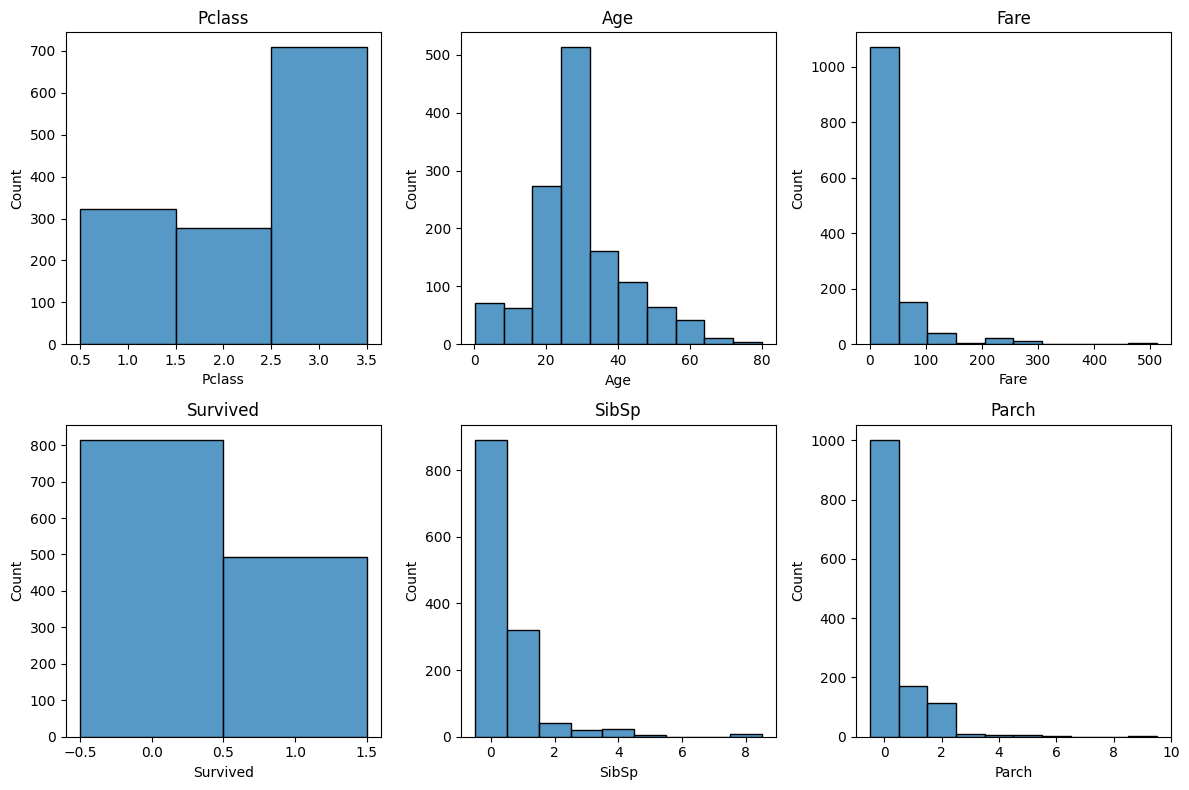

In [110]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

sns.histplot(df['Pclass'].astype('category'), ax=axes[0,0])
axes[0,0].set_title('Pclass')

sns.histplot(df['Age'], bins = 10, ax=axes[0,1])
axes[0,1].set_title('Age')

sns.histplot(df['Fare'], bins = 10, ax=axes[0,2])
axes[0,2].set_title('Fare')

sns.histplot(df['Survived'].astype('category'), ax=axes[1,0])
axes[1,0].set_title('Survived')

sns.histplot(df['SibSp'].astype('category'), ax=axes[1,1])
axes[1,1].set_title('SibSp')

sns.histplot(df['Parch'].astype('category'), ax=axes[1,2])
axes[1,2].set_title('Parch')

plt.tight_layout()

plt.show()

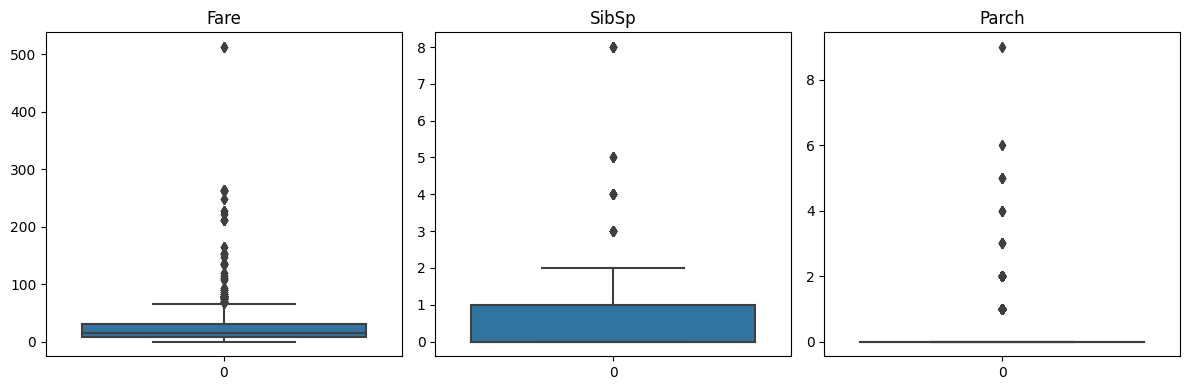

In [111]:
# Outlier detection
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.boxplot(df['Fare'],ax=axes[0])
axes[0].set_title('Fare')

sns.boxplot(df['SibSp'],ax=axes[1])
axes[1].set_title('SibSp')

sns.boxplot(df['Parch'],ax=axes[2])
axes[2].set_title('Parch')

plt.tight_layout()

plt.show()

<ipython-input-112-0dd75f83300f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df.corr(method = "pearson")


<Axes: >

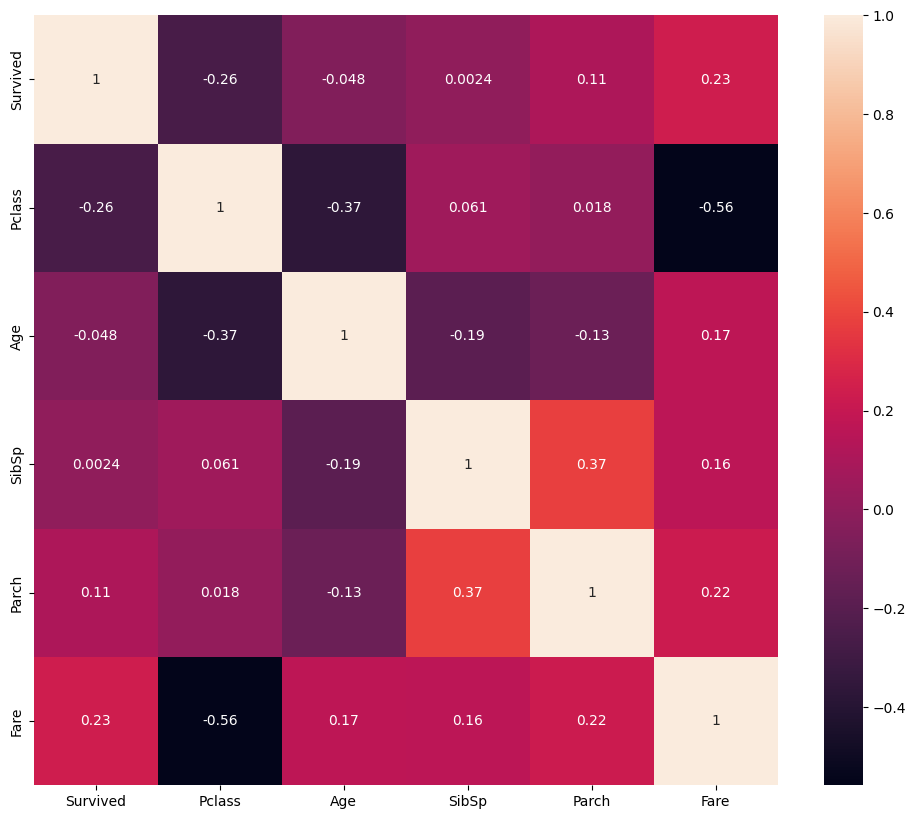

In [112]:
cormat = df.corr(method = "pearson")
plt.figure(figsize = (12,10))
sns.heatmap(cormat, annot =True)


In [ ]:
# random_sample=df1["Age"].dropna().sample(df1["Age"].isnull().sum(),random_state=0)
# random_sample.index=df1[df1["Age"].isnull()].index
# df1.loc[df1["Age"].isnull(),"Age"]=random_sample

In [113]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [114]:
# replacing females with most famous title
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Dr', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Miss')

# replacing males with most famous title
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Dr', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir' ], 'Mr')

[]

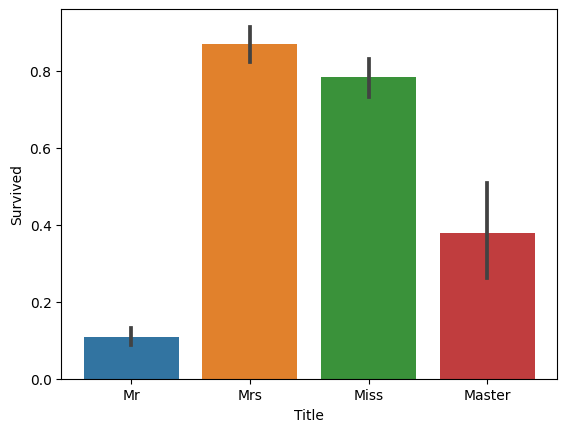

In [115]:
sns.barplot(x = "Title", y = "Survived", data = df)
plt.plot()

In [116]:
IQR=df.SibSp.quantile(0.75)-df.SibSp.quantile(0.25)
lower_bridge=df.SibSp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.SibSp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.5 2.5


In [117]:
df.loc[df["SibSp"]>=2.5,"Age"] = 2.5
df.loc[df["SibSp"]<= -1.5,"Age"]= -1.5

In [118]:
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
lower_bridge=df.Fare.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Fare.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-27.172999999999995 66.34379999999999


In [119]:
df.loc[df["Fare"]>= 66.343,"Fare"] = 66.343
df.loc[df["Fare"]<= -27.173,"Fare"]= -27.173

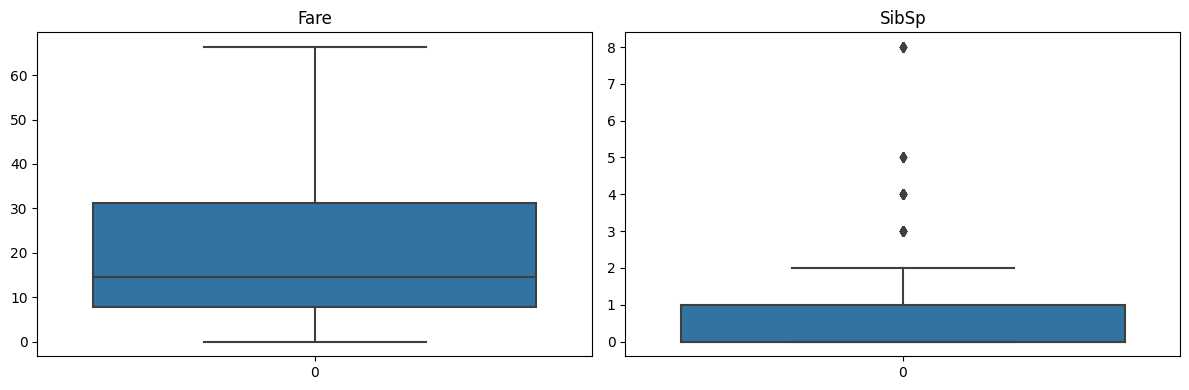

In [120]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.boxplot(df['Fare'],ax=axes[0])
axes[0].set_title('Fare')

sns.boxplot(df['SibSp'],ax=axes[1])
axes[1].set_title('SibSp')

plt.tight_layout()

plt.show()

In [121]:
df["Sex"]= np.where(df["Sex"]== "male" , 1, 0)

In [122]:
label_encoder = LabelEncoder()
df["Embarked"] = label_encoder.fit_transform(df["Embarked"])

In [126]:
label_encoder = LabelEncoder()
df["Title"] = label_encoder.fit_transform(df["Title"])

In [127]:
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.250,0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,66.343,0,3
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.925,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.100,0,3
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.050,0,2


In [128]:
# df = df.drop("Ticket" , axis =1)
df = df.drop("Name" , axis =1)

In [129]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.250,0,2
1,1,1,0,38.0,1,0,66.343,0,3
2,1,3,0,26.0,0,0,7.925,0,1
3,1,1,0,35.0,1,0,53.100,0,3
4,0,3,1,35.0,0,0,8.050,0,2


In [141]:
y = df.iloc[:,0,]
X = df.iloc[:,1:]
print(X,y)

      Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Title
0          3    1  22.000000      1      0   7.2500         0      2
1          1    0  38.000000      1      0  66.3430         0      3
2          3    0  26.000000      0      0   7.9250         0      1
3          1    0  35.000000      1      0  53.1000         0      3
4          3    1  35.000000      0      0   8.0500         0      2
...      ...  ...        ...    ...    ...      ...       ...    ...
1304       3    1  29.881138      0      0   8.0500         0      2
1305       1    0  39.000000      0      0  66.3430         0      1
1306       3    1  38.500000      0      0   7.2500         0      2
1307       3    1  29.881138      0      0   8.0500         0      2
1308       3    1  29.881138      1      1  22.3583         0      0

[1309 rows x 8 columns] 0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: 

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [148]:
X_test.shape

(262, 8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [163]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# clf.predict(X_test)


In [164]:
from sklearn.metrics import accuracy_score
Survived = clf.predict(X_train)
accuracy = accuracy_score(y_train,Survived)
accuracy

0.8576886341929322

In [158]:
from sklearn.metrics import classification_report
print(classification_report(Survived,y_train))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       681
           1       0.78      0.83      0.80       366

    accuracy                           0.86      1047
   macro avg       0.84      0.85      0.85      1047
weighted avg       0.86      0.86      0.86      1047



In [150]:
from sklearn.metrics import accuracy_score
Survived = clf.predict(X_test)
accuracy = accuracy_score(y_test,Survived)

0.20095693779904306

In [159]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6564885496183206


In [160]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.8015267175572519


In [161]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8244274809160306


In [168]:
from sklearn.model_selection import KFold

# Load your dataset into a DataFrame (assuming X as the feature matrix and y as the target variable)
X = pd.DataFrame(X)  # Feature matrix
y = pd.Series(y)     # Target variable
# print(X, y)
# Define the number of folds (k) for cross-validation
k = 10

# Create the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Instantiate your model
    model = LogisticRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the testing data
    score = model.score(X_test, y_test)

    # Print the evaluation score
    print("Evaluation score:", score)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Evaluation score: 0.8473282442748091
Evaluation score: 0.8396946564885496
Evaluation score: 0.8778625954198473
Evaluation score: 0.8091603053435115
Evaluation score: 0.8473282442748091


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation score: 0.8473282442748091
Evaluation score: 0.8702290076335878


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Evaluation score: 0.8931297709923665
Evaluation score: 0.8625954198473282
Evaluation score: 0.8538461538461538
